# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

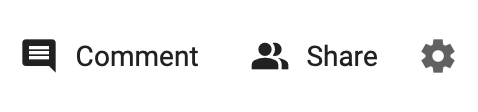

# **LABORATORIO DE REGRESIÓN: PREDICCIÓN DEL NÚMERO DE USUARIOS ACTIVOS EN UNA PLATAFORMA**

En este laboratorio queremos predecir el número de usuarios activos en una plataforma en línea según la hora del día a partir de una serie de mediciones que disponemos en una base de datos. Para esto usaremos métodos de regresión.

# **Visualización del Dataset**

Importamos las bibliotecas necesarias: pandas para cargar el archivo CSV en un DataFrame de pandas y matplotlib.pyplot para trazar el gráfico.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos del archivo CSV en un DataFrame de pandas usando la función pd.read_csv(). El archivo CSV debe tener dos columnas llamadas "hour" y "users" para que el código funcione correctamente. El archivo CSV se carga en un DataFrame llamado df

In [2]:
# Cargar los datos del archivo CSV en un DataFrame de pandas

url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/active_users_data.csv'
df = pd.read_csv(url)

#df = pd.read_csv('data.csv')


Usamos la función plt.scatter() para crear el gráfico de dispersión. Le pasamos la columna "hour" como eje x y la columna "users" como eje y. El resultado es un gráfico de puntos en el que cada punto representa una combinación de valores de hora y usuarios. Usamos las funciones plt.xlabel() y plt.ylabel() para establecer etiquetas en los ejes x e y del gráfico, respectivamente. Finalmente, usamos la función plt.show() para mostrar el gráfico en la pantalla.

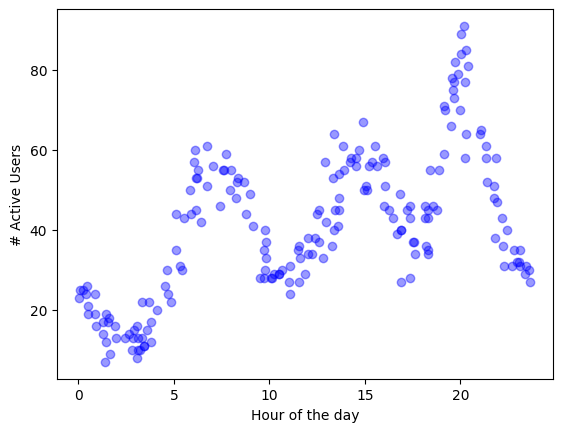

In [3]:
# Crea un scatter plot de "users" vs "hour"
plt.scatter(df['hour'], df['users'], color='b', alpha=0.4, label='Data')

# Etiqueta los ejes
plt.xlabel('Hour of the day')
plt.ylabel('# Active Users')

# Muestra el plot
plt.show()

# **Modelo de regresión lineal**

En este apartado implementaremos regresión lineal sin regularización. Dado que el dataset muestra una relación no lineal (ver visualización arriba), es necesario utilizar regresión polinómica.

Primero, se importan las bibliotecas necesarias, que incluyen:

* PolynomialFeatures: una función para generar características polinómicas para
un conjunto de datos.
* StandardScaler: una función para escalar los datos a un rango común.
* LinearRegression: una función para ajustar un modelo lineal a los datos.
* Pipeline: una función para concatenar varias transformaciones en un estimador.
mean_squared_error: una función para calcular el error cuadrático medio.
* r2_score: una función para calcular el coeficiente de determinación R^2.
* train_test_split: una función para dividir los datos en conjuntos de entrenamiento y prueba.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np # matlab de python


A continuación, se define una función llamada calculate_regression_metrics que toma un modelo, un conjunto de datos x y una variable objetivo ytrue, y devuelve la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación R^2. Esta función se utilizará más adelante para calcular las métricas de error para el conjunto de entrenamiento y prueba.

In [5]:
# función auxiliar para calcular el RMSE y R2 de un modelo de regresión
def calculate_regression_metrics(model, x, ytrue):
    ypred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(ytrue, ypred))
    r2 = r2_score(ytrue, ypred)
    return rmse, r2

Luego, los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función train_test_split.

In [6]:
# división aleatoria de datos en conjunto de entrenamiento y conjunto de text
split_seed = 11  # para reproducibilidad
train_frac = 0.8 #80 % para train, 20% para test (random)
train_df, test_df = train_test_split(df, train_size=train_frac, random_state=split_seed)
print(train_df.head())

          hour  users
163  14.287734     58
137  19.130252     59
30    0.479183     26
103  13.637112     54
98   13.289953     36


A continuación, se ajusta un modelo de regresión polinómica de grado N (ver variable degree) al conjunto de entrenamiento utilizando la función Pipeline.



In [7]:
# Ajustar en el conjunto de entrenamiento
degree = 100 # Grado del polinomio
model = Pipeline([ #REPRESENTAR
                    ('poly', PolynomialFeatures(degree)), #1era etapa
                    ('scal', StandardScaler()), #2do paso zscore
                    ('reg', LinearRegression()) #3er paso, reg. lin normal
                ])
model.fit(train_df[['hour']], train_df['users'])

Pipeline(steps=[('poly', PolynomialFeatures(degree=100)),
                ('scal', StandardScaler()), ('reg', LinearRegression())])

Luego, se utilizan la función calculate_regression_metrics y los conjuntos de entrenamiento y prueba para calcular el RMSE y el R^2 para el modelo ajustado en ambos conjuntos.

In [8]:
# Calcular error  MSE y R2 en el conjunto de entrenamiento
rmse_train, r2_train = calculate_regression_metrics(model, train_df[['hour']], train_df['users'])
print("RMSE train: ", rmse_train, "R-squared train:", r2_train)

# Calcular error  MSE y R2 en el conjunto de test
rmse_test, r2_test = calculate_regression_metrics(model, test_df[['hour']], test_df['users'])
print("RMSE test: ", rmse_test, "R-squared test:", r2_test)

RMSE train:  5.236770149169356 R-squared train: 0.9229747711632643
RMSE test:  6.691110944141828 R-squared test: 0.8203011179087847


Después, se utiliza el modelo ajustado para predecir los valores de la variable objetivo en el conjunto de prueba.

In [9]:
# Predecir en el conjunto de test
pred_test = model.predict(test_df[['hour']])
print(pred_test)

[40.16477709 37.15608233 50.86637698 54.76643039 43.13997825 39.92779194
 43.12935434 53.89577516 56.656242   33.83728753 23.45292626 26.53222619
 75.16306223 12.76711999 18.98409644 48.4897915  44.91998935 44.99640199
 38.28585015 37.33727437 38.32115136 66.13865596 30.99906884 12.49990807
 50.46113549 28.54879723 51.4174199  51.38347588 80.75605037 13.41517602
 35.75924378 42.78964369 31.11830102 30.67985497 79.99634248 28.29031335
 52.68079339 39.99137078 25.3662716  80.73631302]


Finalmente, graficamos el conjunto de entrenamiento y en rojo el modelo entrenado

d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


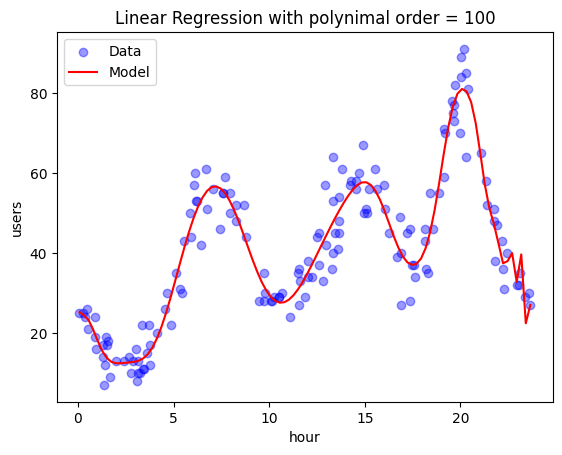

In [10]:

# Generar una secuencia de valores para hour entre 0 y 24 horas
hour_seq = np.linspace(train_df['hour'].min(), train_df['hour'].max(), num=100).reshape(-1, 1)

# Predecir los valores de users para la secuencia de valores de hour
users_pred = model.predict(hour_seq)

# Graficar los valores de hour en el eje x y los valores predichos de users en el eje y
plt.scatter(train_df['hour'], train_df['users'], color='b', alpha=0.4, label='Data')
plt.plot(hour_seq, users_pred, color='red', label='Model')
plt.xlabel('hour')
plt.ylabel('users')
plt.title("Linear Regression with polynimal order = "+str(degree))
plt.legend()
plt.show()

## **Selección del mejor modelo: Optimizando el hiperparámetro "grado del polinomio"**


Este código utiliza varias bibliotecas de Python, principalmente de Scikit-learn y Matplotlib, para ajustar un modelo de regresión lineal con características polinomiales a un conjunto de datos.

1. **Importaciones**:
   - `GridSearchCV` de `sklearn.model_selection`: Utilizado para realizar una búsqueda exhaustiva sobre un rango especificado de hiperparámetros de un modelo.
   - `matplotlib.pyplot` como `plt` y `numpy` como `np`: Bibliotecas para manejar gráficos y operaciones numéricas, respectivamente. Aunque se importan, no se utilizan directamente en el fragmento de código proporcionado.

2. **Creación del Diccionario de Parámetros (`param_grid`)**:
   - Se define un diccionario con los hiperparámetros que se quieren ajustar. Aquí, se está ajustando el grado del polinomio (`poly__degree`) que varía desde 1 hasta 100.

3. **Definición de la Pipeline (`model`)**:
   - Se utiliza una `Pipeline` para encadenar varios pasos de procesamiento y modelado:
     - `PolynomialFeatures()` para generar características polinomiales a partir de los datos de entrada.
     - `StandardScaler()` para estandarizar las características generadas, es decir, ajustarlas para que tengan media 0 y varianza 1.
     - `LinearRegression()` para aplicar un modelo de regresión lineal.

4. **Inicialización de `GridSearchCV`**:
   - Se crea una instancia de `GridSearchCV`, especificando el modelo (pipeline), el diccionario de parámetros, y varias opciones adicionales:
     - `cv=5` indica que se debe usar una validación cruzada de 5-folds.
     - `scoring='neg_mean_squared_error'` establece el error cuadrático medio negativo como la métrica para evaluar el modelo. El signo negativo se usa porque GridSearchCV busca maximizar un score, mientras que queremos minimizar el error.
     - `return_train_score=True` indica que los scores de entrenamiento también deben ser incluidos en los resultados.
     - `verbose=1` activa mensajes de progreso (cuanto más alto es el número, más mensajes se muestran).

5. **Ajuste de `GridSearchCV` al Conjunto de Entrenamiento**:
   - `grid_search.fit(train_df[['hour']], train_df['users'])`: Aquí se ajusta el `GridSearchCV` a los datos de entrenamiento. Se supone que `train_df` es un DataFrame que contiene al menos dos columnas: `hour` y `users`. `hour` se utiliza como característica y `users` como la variable objetivo (por ejemplo, número de usuarios activos en un sitio web durante ciertas horas).

Este script es especialmente útil para modelar relaciones no lineales entre las características y la variable de respuesta, optimizando simultáneamente los hiperparámetros del modelo. Una vez completado el ajuste, el modelo con el mejor rendimiento (menor error cuadrático medio) se puede seleccionar e inspeccionar utilizando los métodos y atributos de `grid_search`.

In [11]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario de parámetros a probar
param_grid = {'poly__degree': np.arange(1, 101)}

# Definir la pipeline
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scal', StandardScaler()),
    ('reg', LinearRegression())
])

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid,
                           cv=5,# kfold cross val
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=4)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train_df[['hour']], train_df['users'])




Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END poly__degree=1;, score=(train=-244.084, test=-138.842) total time=   0.0s
[CV 2/5] END poly__degree=1;, score=(train=-227.244, test=-207.464) total time=   0.0s
[CV 3/5] END poly__degree=1;, score=(train=-205.330, test=-298.856) total time=   0.0s
[CV 4/5] END poly__degree=1;, score=(train=-206.478, test=-291.545) total time=   0.0s
[CV 5/5] END poly__degree=1;, score=(train=-228.789, test=-203.915) total time=   0.0s
[CV 1/5] END poly__degree=2;, score=(train=-215.735, test=-128.003) total time=   0.0s
[CV 2/5] END poly__degree=2;, score=(train=-201.720, test=-182.340) total time=   0.0s
[CV 3/5] END poly__degree=2;, score=(train=-186.709, test=-249.410) total time=   0.0s
[CV 4/5] END poly__degree=2;, score=(train=-190.954, test=-230.118) total time=   0.0s
[CV 5/5] END poly__degree=2;, score=(train=-188.105, test=-247.459) total time=   0.0s
[CV 1/5] END poly__degree=3;, score=(train=-214.201, test=-118.435)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scal', StandardScaler()),
                                       ('reg', LinearRegression())]),
             param_grid={'poly__degree': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=4)

A continuación, este fragmento de código proporciona una visualización detallada de los resultados obtenidos de una búsqueda de hiperparámetros utilizando `GridSearchCV` para un modelo de regresión con características polinomiales.

1. **Obtener los Resultados de la Búsqueda de Parámetros**:
   - `results = grid_search.cv_results_` guarda en `results` todos los resultados de la validación cruzada para cada combinación de parámetros probados durante la búsqueda de `GridSearchCV`. Esta información incluye, entre otras cosas, el score medio de entrenamiento y validación para cada configuración de parámetros.

2. **Obtener el Mejor Modelo Encontrado por GridSearchCV**:
   - `best_model = grid_search.best_estimator_` recupera el mejor modelo encontrado por `GridSearchCV` basado en la métrica de evaluación especificada (en este caso, el error cuadrático medio negativo).

3. **Extraer los Errores de Entrenamiento y Validación Cruzada**:
   - `train_errors = np.sqrt(-results['mean_train_score'])` y `val_errors = np.sqrt(-results['mean_test_score'])` calculan la raíz del error cuadrático medio (RMSE) para los scores de entrenamiento y validación, respectivamente. Los valores están negativos en `results` porque el `scoring` especificado fue `neg_mean_squared_error`, por lo que se necesita convertirlos a positivo y luego tomar la raíz cuadrada para obtener el RMSE.

4. **Obtener los Grados del Polinomio Probados**:
   - `degrees = param_grid['poly__degree']` extrae los grados del polinomio que fueron probados en la búsqueda de parámetros.

5. **Graficar los Errores de Entrenamiento y Validación Cruzada**:
   - Aquí se crea un gráfico que compara el RMSE de entrenamiento y validación en función del grado polinomial:
     - Se utiliza un gráfico de escala logarítmica tanto para el eje x (grados del polinomio) como para el eje y (RMSE) para manejar mejor el amplio rango de valores y visualizar las tendencias más claramente.
     - Se añaden etiquetas, título, una leyenda, y se habilita la cuadrícula para mejorar la legibilidad del gráfico.

6. **Destacar el Mejor Modelo**:
   - `best_degree = best_model.named_steps['poly'].degree` recupera el grado del polinomio del mejor modelo encontrado.
   - `plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best model at Polynomial Degree: {best_degree}')` añade una línea vertical en el gráfico para destacar el grado polinomial del mejor modelo.

El uso de este código es ideal para visualizar cómo el grado del polinomio afecta el rendimiento del modelo y para identificar un equilibrio adecuado entre el ajuste a los datos de entrenamiento y la generalización a nuevos datos, indicado por los errores de validación.

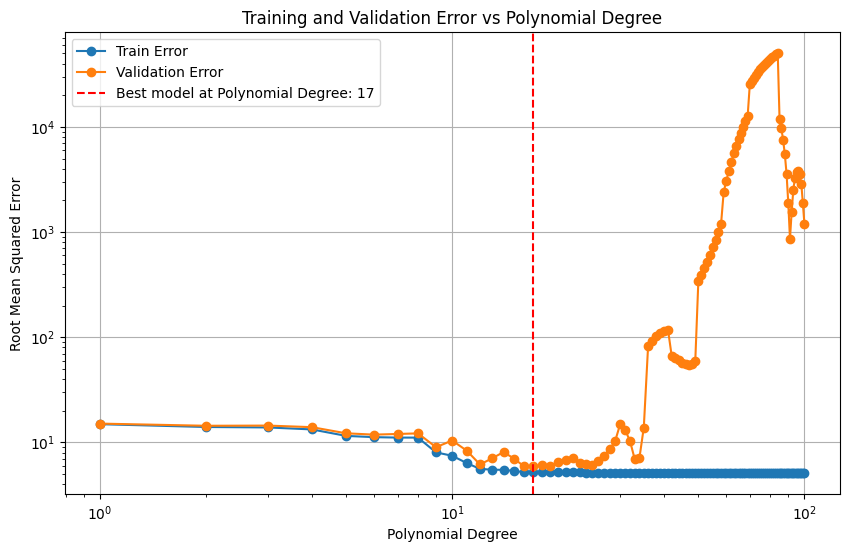

In [12]:
# Obtener los resultados de la búsqueda de parámetros
results = grid_search.cv_results_

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Extraer los errores de entrenamiento y validación cruzada
train_errors = np.sqrt(-results['mean_train_score'])
val_errors = np.sqrt(-results['mean_test_score'])

# Obtener los grados del polinomio probados
degrees = param_grid['poly__degree']

# Graficar los errores de entrenamiento y validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, val_errors, label='Validation Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation Error vs Polynomial Degree')

plt.grid(True)

# Obtener el grado del polinomio seleccionado por el mejor modelo
best_degree = best_model.named_steps['poly'].degree
# Dibujar una línea vertical en el grado del polinomio seleccionado
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best model at Polynomial Degree: {best_degree}')
plt.legend()
plt.show()

Finalmente, en la siguiente celda de código evaluamos el modelo en el conjunto de test:

1. **Obtener el Mejor Modelo**:
   - `best_model = grid_search.best_estimator_` recupera el mejor modelo del objeto `GridSearchCV`. Este modelo es el que tuvo el mejor desempeño en la validación cruzada según la métrica especificada.

2. **Ajustar el Mejor Modelo al Conjunto de Entrenamiento**:
   - `best_model.fit(train_df[['hour']], train_df['users'])` ajusta el mejor modelo a los datos de entrenamiento. Aquí, se asume que `train_df` es un DataFrame que contiene al menos dos columnas: `hour` y `users`. La columna `hour` se utiliza como característica y `users` como la variable objetivo.  En un escenario práctico, este paso sería redundante porque 'GridSearchCV' ya ajusta el mejor modelo.Sin embargo, se incluye aquí con fines didácticos para demostrar cómo se realiza el ajuste de un modelo.


3. **Hacer Predicciones con el Mejor Modelo**:
   - `predictions = best_model.predict(test_df[['hour']])` utiliza el modelo ya ajustado para hacer predicciones sobre un conjunto de prueba separado, `test_df`.

4. **Evaluar el Rendimiento del Modelo en el Conjunto de Prueba**:
   - `rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])` calcula las métricas de rendimiento del modelo en el conjunto de prueba.



In [13]:
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Ajustar el mejor modelo al conjunto de entrenamiento
# En un escenario práctico, este paso sería redundante porque 'GridSearchCV' ya ajusta el mejor modelo.
# Sin embargo, se incluye aquí con fines didácticos para demostrar cómo se realiza el ajuste de un modelo.
best_model.fit(train_df[['hour']], train_df['users'])

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(test_df[['hour']])

# Evaluar el rendimiento del modelo en el conjunto de prueba
rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])
print("RMSE test (best model): ", rmse_test,  'active users')
print("R-squared test (best model):", r2_test)


RMSE test (best model):  6.5069152405581265 active users
R-squared test (best model): 0.8300585917389962


## ✅ **Actividad Regresión Lineal**

Discuta brevemente sobre la figura "grado del polinomio" vs RMSE arriba graficada para la regresión lineal.


# **Modelo de Regresión de Ridge**




Ahora, vamos a abordar el problema usando Regresión lineal de Ridge. Recuerde que la regresión de Ridge incluye un hiperparámetro llamado hiperparámetro de regularización que controla el overfitting. El hiperparámetro de regularización varía entre 0 e infinito. Normalmente, lambda tiene valores pequeños como veremos en este laboratorio. Valores grande de lambda pueden causar "underfitting" mientras que valores cercanos a cero pueden causar overfitting.

Primero se importa el modelo de regresión Ridge desde sklearn.linear_model.


In [14]:

from sklearn.linear_model import Ridge # L2 norm regularizer

Luego, se establece el valor de regularización lambda_value en 1
Se crea además un modelo de regresión Ridge utilizando un Pipeline de tres pasos:
1. PolynomialFeatures(degree=75) crea características polinómicas de grado 75 a partir de los datos de entrada.
2. StandardScaler() estandariza los datos para que tengan media cero y varianza unitaria.
3. Ridge(alpha=lambda_value) ajusta el modelo de regresión Ridge utilizando el valor de regularización lambda_value. Aunque en clase este hiperparámetro lo definimos con la letra griega lambda, es importante mencionar que en la librería sklearn, este hiperparámetro lo definen con la letra griega alfa.

In [15]:
lambda_value = 1e-18
# Ajustar en el conjunto de entrenamiento
model_ridge = Pipeline([
                        ('poly', PolynomialFeatures(degree=75)), #NO MODIFICAR
                        ('scal', StandardScaler()),
                        ('reg', Ridge(alpha=lambda_value))
                        ])


Finalmente, el siguiente código ajusta el modelo de Ridge, calcula las métricas correspondientes y presenta el modelo en un gráfico. Note que este código es similar al anteriormente usado por lo que no entraremos en detalle en su funcionamiento. Consulte en la sección anterior para más detalles.

MSE train:  5.251266768694174 R-squared train: 0.9225477327718498
MSE test:  6.281197199379752 R-squared test: 0.8416442744994903


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


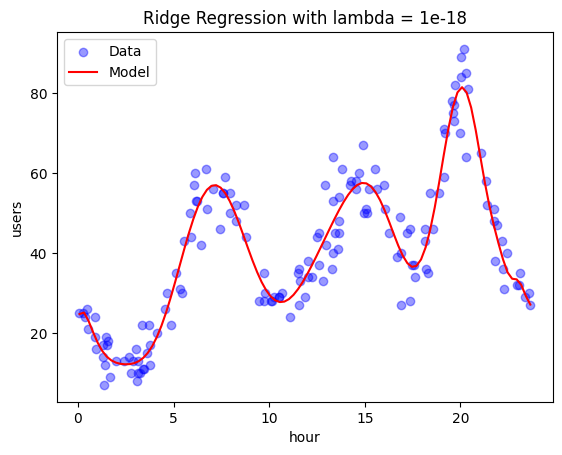

In [16]:

model_ridge.fit(train_df[['hour']], train_df['users'])

# Calcular error  MSE y R2 en el conjunto de entrenamiento
rmse_train, r2_train = calculate_regression_metrics(model_ridge, train_df[['hour']], train_df['users'])
print("MSE train: ", rmse_train, "R-squared train:", r2_train)

# Calcular error  MSE y R2 en el conjunto de test
rmse_test, r2_test = calculate_regression_metrics(model_ridge, test_df[['hour']], test_df['users'])
print("MSE test: ", rmse_test, "R-squared test:", r2_test)

# Predecir en el conjunto de test
pred_test = model_ridge.predict(test_df[['hour']])

# Generar una secuencia de valores para hour entre 0 y 24 horas
hour_seq = np.linspace(train_df['hour'].min(), train_df['hour'].max(), num=100).reshape(-1, 1)

# Predecir los valores de users para la secuencia de valores de hour
users_pred = model_ridge.predict(hour_seq)

# Graficar los valores de hour en el eje x y los valores predichos de users en el eje y
plt.scatter(train_df['hour'], train_df['users'], color='b', alpha=0.4, label='Data')
plt.plot(hour_seq, users_pred, color='red', label='Model')
plt.xlabel('hour')
plt.ylabel('users')
plt.title("Ridge Regression with lambda = "+str(lambda_value))
plt.legend()
plt.show()

## **Selección del mejor modelo de Ridge: Optimizando el hiperparámetro $\lambda$**



El código a continuación realiza un proceso de ajuste y evaluación de un modelo de regresión Ridge, similar al ejercicio previo con regresión lineal, pero incorporando regularización L2 a través del hiperparámetro lambda ($\lambda$). Aquí, se establece un grado polinomial alto (55) para las características de entrada, con el propósito de observar el efecto de la regularización Ridge en un escenario donde es probable que se produzca sobreajuste debido a la complejidad del modelo.

El código sigue estos pasos clave:

1. **Configuración de la Búsqueda de Hiperparámetros**: Se define un rango para el hiperparámetro de regularización ($\lambda$), `alpha` en Scikit-learn) que se quiere optimizar, utilizando valores desde $10^{-10}$ hasta $10^{3}$.

2. **Definición del Modelo**: Se crea una `Pipeline` que incluye transformaciones polinómicas de grado 55 y estandarización de las características, seguido por el modelo Ridge, que utiliza regularización L2.

3. **Búsqueda con GridSearchCV**: Se utiliza `GridSearchCV` para encontrar el valor óptimo de $\lambda$ mediante validación cruzada con 2 folds, evaluando los modelos con el error cuadrático medio negativo.

4. **Entrenamiento y Validación**: El mejor modelo obtenido de `GridSearchCV` es entrenado y validado, extrayendo los errores de entrenamiento y validación para su análisis.

5. **Visualización**: Se grafican los errores de entrenamiento y validación en función del hiperparámetro $\lambda$, con escalas logarítmicas en ambos ejes, para mostrar cómo varía el rendimiento con diferentes niveles de regularización.

6. **Selección y Evaluación del Mejor Modelo**: Se destaca el mejor valor de $\lambda$ encontrado y se evalúa el rendimiento del modelo seleccionado en un conjunto de prueba, mostrando el RMSE y el coeficiente de determinación  $R^2$.

El propósito educativo del código es demostrar el impacto de la regularización en un modelo propenso al sobreajuste y cómo la optimización de $\lambda$ puede mejorar la capacidad de generalización del modelo. La regularización L2 pretende penalizar los coeficientes más grandes, forzando al modelo a mantenerlos pequeños, lo que suele resultar en una mejor generalización y en la prevención del sobreajuste en modelos altamente complejos.

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END reg__alpha=1e-10;, score=(train=-24.053, test=-43.127) total time=   0.0s
[CV 2/2] END reg__alpha=1e-10;, score=(train=-27.286, test=-836.892) total time=   0.0s
[CV 1/2] END reg__alpha=1.3530477745798075e-10;, score=(train=-24.158, test=-42.998) total time=   0.0s
[CV 2/2] END reg__alpha=1.3530477745798075e-10;, score=(train=-27.376, test=-866.438) total time=   0.0s
[CV 1/2] END reg__alpha=1.8307382802953697e-10;, score=(train=-24.258, test=-42.859) total time=   0.0s
[CV 2/2] END reg__alpha=1.8307382802953697e-10;, score=(train=-27.449, test=-861.720) total time=   0.0s
[CV 1/2] END reg__alpha=2.477076355991714e-10;, score=(train=-24.354, test=-42.722) total time=   0.0s
[CV 2/2] END reg__alpha=2.477076355991714e-10;, score=(train=-27.509, test=-829.815) total time=   0.0s
[CV 1/2] END reg__alpha=3.351602650938848e-10;, score=(train=-24.444, test=-42.593) total time=   0.0s
[CV 2/2] END reg__alpha=3.35160265

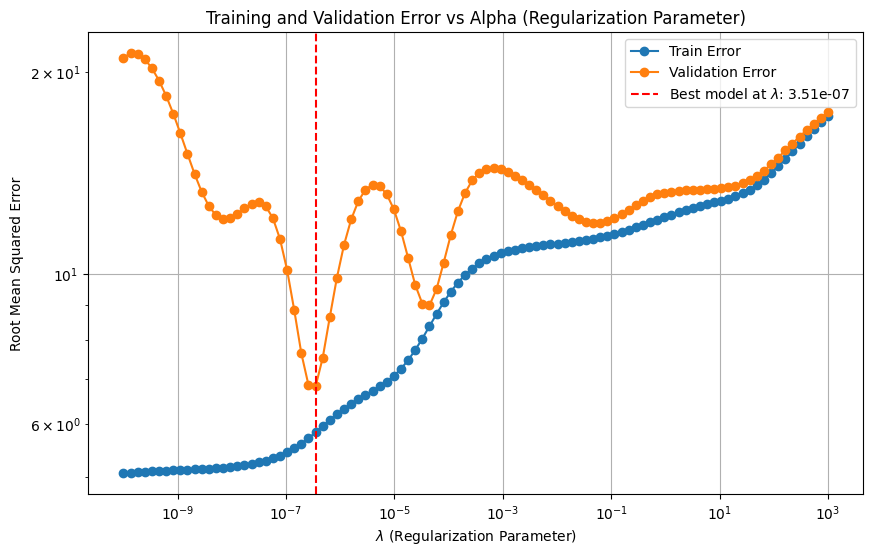

RMSE test (best model):  6.626594445310654 active users
R-squared test (best model): 0.8237497678098411


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario de parámetros a probar
param_grid = {'reg__alpha': np.logspace(-10, 3, 100)} # Rango de valores para alpha (parámetro de regularización)

# Definir la pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)), # Se fija el grado del polinomio en 75
    ('scal', StandardScaler()),
    ('reg', Ridge()) # Se cambia a Ridge
])

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid,
                           cv=2, # kfold cross validation
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=4)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train_df[['hour']], train_df['users'])

# Obtener los resultados de la búsqueda de parámetros
results = grid_search.cv_results_

# Obtener el mejor modelo encontrado por GridSearchCV
# En un escenario práctico, este paso sería redundante porque 'GridSearchCV' ya ajusta el mejor modelo.
# Sin embargo, se incluye aquí con fines didácticos para demostrar cómo se realiza el ajuste de un modelo.
best_model = grid_search.best_estimator_

# Extraer los errores de entrenamiento y validación cruzada
train_errors = np.sqrt(-results['mean_train_score'])
val_errors = np.sqrt(-results['mean_test_score'])

# Obtener los valores de alpha probados
alphas = param_grid['reg__alpha']

# Graficar los errores de entrenamiento y validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train Error', marker='o')
plt.plot(alphas, val_errors, label='Validation Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Validation Error vs Alpha (Regularization Parameter)')

plt.grid(True)

# Obtener el valor de alpha seleccionado por el mejor modelo
best_alpha = best_model.named_steps['reg'].alpha
# Dibujar una línea vertical en el valor de alpha seleccionado
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha:.2e}')
plt.legend()
plt.show()

# Ajustar el mejor modelo al conjunto de entrenamiento
best_model.fit(train_df[['hour']], train_df['users'])

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(test_df[['hour']])

# Evaluar el rendimiento del modelo en el conjunto de prueba
rmse_test, r2_test = calculate_regression_metrics(best_model, test_df[['hour']], test_df['users'])
print("RMSE test (best model): ", rmse_test, 'active users')
print("R-squared test (best model):", r2_test)


## ✅ **Actividad Regresión de Ridge**

 Discuta brevemente sobre la figura $\lambda$ vs RMSE arriba graficada para la regresión de Ridge

> 🖊 `Desarrollar aquí su actividad`

La figura descrita en el espacio anterior, se oberva que cae en un under-fiting al incremento del alpha tanto como las muestras de entrenamiento y las de tests crecen en su error.
Ademas se puede observar que las si el alpha es demasiado pequeño las muestras de train tienen un valor de error muy alto, se debe escojer un alpha intermedio segun lo caracteristica que muestra la figura 

## ✅ **Actividad Regresión de Lasso y de ElasticNet**

**Parte 1:**

En esta actividad usted realizará una investigación bibliográfica corta sobre los siguientes algoritmos de regresión que son complementarios a los estudiados en clase:
1. Lasso
2. ElasticNet

Su consulta debe resumir las diferencias entre las 2 formas de regresión (Lasso y ElascticNet) y la regresión de Ridge. Liste además qué funciones de sklearn las implementan. Observe que esta actividad no requiere codificación. Lecturas recomendadas:

https://bookdown.org/ssjackson300/Machine-Learning-Lecture-Notes/ridge-regression.html

https://glmnet.stanford.edu/articles/glmnet.html


Finalmente, con base en su consulta, considere la siguiente figura en la que el eje X representa el parámetro de regularización L2 y el eje Y muestra los valores de los parámetros Theta de un modelo de regresión asociados a cada característica (e.g., Income, Limit, Rating,etc.). ¿A qué tipo de regresión (Ridge o Lasso) es más probable que se relacione esta figura?  ¿Por qué?

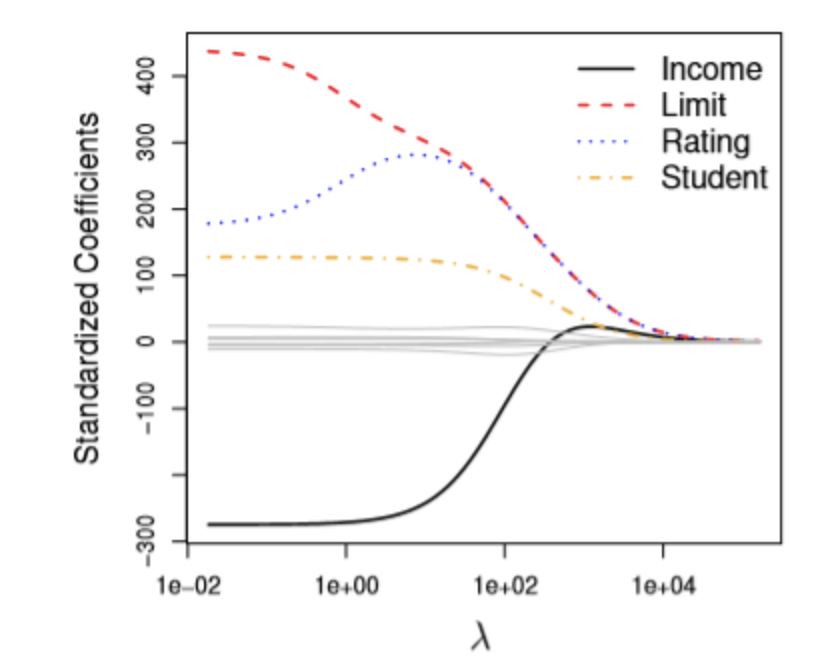

1. # Ridge Regression
Tipo de regularización: L2 (penaliza el cuadrado de los coeficientes).

Efecto principal: Reduce la magnitud de los coeficientes pero no los lleva a cero.

Útil cuando: Hay muchas variables correlacionadas; mantiene todas las variables en el modelo.

Función en sklearn: sklearn.linear_model.Ridge

2. # Lasso Regression
Tipo de regularización: L1 (penaliza el valor absoluto de los coeficientes).

Efecto principal: Algunos coeficientes pueden ser llevados exactamente a cero (selección automática de variables).

Útil cuando: Se desea un modelo más simple y con menos variables (modelo disperso o "sparse").

Función en sklearn: sklearn.linear_model.Lasso

3. ElasticNet Regression
Tipo de regularización: Combinación de L1 y L2 (controlada por el parámetro l1_ratio).

Efecto principal: Combina las ventajas de Ridge y Lasso: puede reducir coeficientes y eliminar algunos, pero con mayor estabilidad.

Útil cuando: Hay muchas variables, algunas correlacionadas, y se busca un equilibrio entre selección de variables y estabilidad.

Función en sklearn: sklearn.linear_model.ElasticNet

# Analisis de la figura 

- Se observa que la figura los thetas no se hacen 0 de manera muy abruta y toman alpha muy alto paras que lo sea, lo cual no dice que es un regresión RIDGE 



**Parte 2 (OPCIONAL) :**

1. Implemente Lasso para el dataset de esta notebook. Optimice los hiperparámetros de Lasso. Incluya las gráficas que se realizan arriba para Ridge.
2. Implemente ElasticNet para el dataset de esta notebook. Optimice los hiperparámetros de ElasticNet.  Incluya las gráficas que se realizan arriba para Ridge.




> 🖊 `Desarrollar aquí su actividad`

d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+03, tolerance: 3.277e+00
  model = cd_fast.enet_coordinate_descent(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e+03, tolerance: 2.400e+00
  model = cd_fast.enet_coordinate_descent(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+03, toleranc

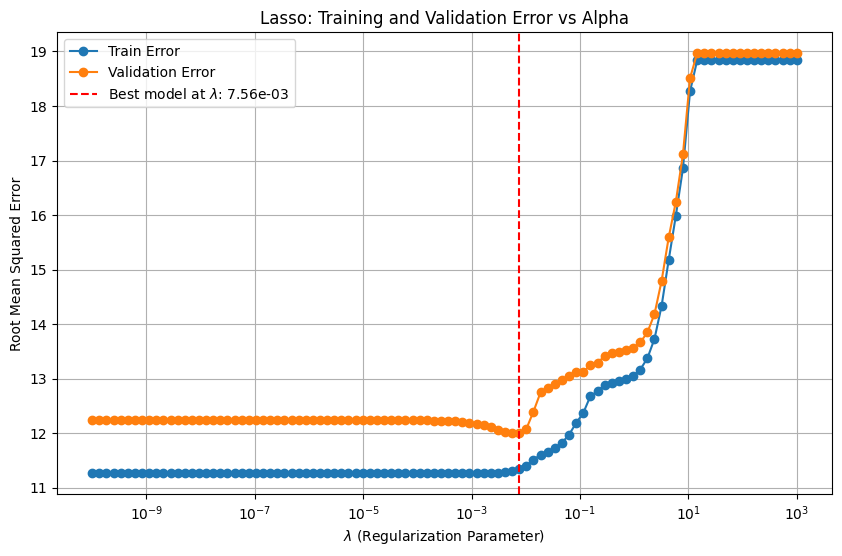

Lasso - RMSE test: 10.127732800103855 active users
Lasso - R^2 test: 0.5883070943492124


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.531e+02, tolerance: 5.697e+00
  model = cd_fast.enet_coordinate_descent(


In [18]:
from sklearn.linear_model import Lasso

# Grid para Lasso
param_grid_lasso = {'reg__alpha': np.logspace(-10, 3, 100)}

# Pipeline para Lasso
lasso_model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)),
    ('scal', StandardScaler()),
    ('reg', Lasso(max_iter=10000))  # Lasso puede necesitar más iteraciones
])

# GridSearchCV para Lasso
grid_lasso = GridSearchCV(lasso_model, param_grid_lasso,
                          cv=2,
                          scoring='neg_mean_squared_error',
                          return_train_score=True,
                          verbose=0)

# Ajustar el modelo
grid_lasso.fit(train_df[['hour']], train_df['users'])

# Obtener resultados
results_lasso = grid_lasso.cv_results_
best_lasso = grid_lasso.best_estimator_

# Extraer errores
train_errors_lasso = np.sqrt(-results_lasso['mean_train_score'])
val_errors_lasso = np.sqrt(-results_lasso['mean_test_score'])
alphas_lasso = param_grid_lasso['reg__alpha']
best_alpha_lasso = best_lasso.named_steps['reg'].alpha

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(alphas_lasso, train_errors_lasso, label='Train Error', marker='o')
plt.plot(alphas_lasso, val_errors_lasso, label='Validation Error', marker='o')
plt.axvline(x=best_alpha_lasso, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha_lasso:.2e}')
plt.xscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title('Lasso: Training and Validation Error vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

# Evaluación
best_lasso.fit(train_df[['hour']], train_df['users'])
predictions_lasso = best_lasso.predict(test_df[['hour']])
rmse_lasso, r2_lasso = calculate_regression_metrics(best_lasso, test_df[['hour']], test_df['users'])
print("Lasso - RMSE test:", rmse_lasso, "active users")
print("Lasso - R^2 test:", r2_lasso)


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+03, tolerance: 3.277e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e+03, tolerance: 2.400e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

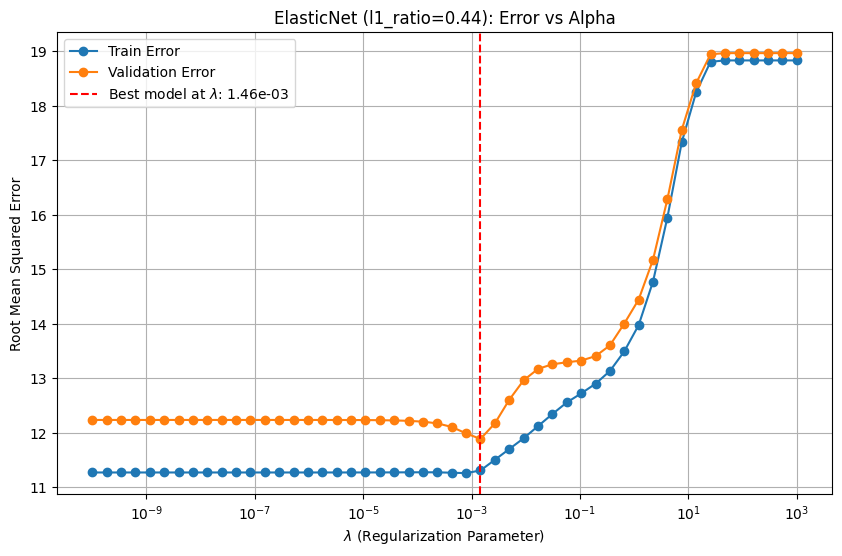

ElasticNet - RMSE test: 9.944561927678404 active users
ElasticNet - R^2 test: 0.6030642396263982


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.977e+03, tolerance: 5.697e+00
  model = cd_fast.enet_coordinate_descent(


In [19]:
from sklearn.linear_model import ElasticNet

# Grid para ElasticNet (alpha y l1_ratio)
param_grid_en = {
    'reg__alpha': np.logspace(-10, 3, 50),
    'reg__l1_ratio': np.linspace(0, 1, 10)  # l1_ratio: 0 = Ridge, 1 = Lasso
}

# Pipeline
enet_model = Pipeline([
    ('poly', PolynomialFeatures(degree=55)),
    ('scal', StandardScaler()),
    ('reg', ElasticNet(max_iter=10000))
])

# GridSearchCV para ElasticNet
grid_enet = GridSearchCV(enet_model, param_grid_en,
                         cv=2,
                         scoring='neg_mean_squared_error',
                         return_train_score=True,
                         verbose=0)

# Ajustar el modelo
grid_enet.fit(train_df[['hour']], train_df['users'])

# Resultados
results_en = grid_enet.cv_results_
best_enet = grid_enet.best_estimator_

# Extraer errores para cada alpha (únicamente si l1_ratio fijo; para gráfico más claro)
# Por simplicidad, se fija l1_ratio al mejor para la curva
best_l1_ratio = best_enet.named_steps['reg'].l1_ratio
errors_alpha_en = []
for alpha in param_grid_en['reg__alpha']:
    idx = np.where((results_en['param_reg__alpha'].data == alpha) & 
                   (results_en['param_reg__l1_ratio'].data == best_l1_ratio))[0]
    if len(idx):
        idx = idx[0]
        errors_alpha_en.append((
            alpha,
            np.sqrt(-results_en['mean_train_score'][idx]),
            np.sqrt(-results_en['mean_test_score'][idx])
        ))

alphas_en, train_errors_en, val_errors_en = zip(*errors_alpha_en)
best_alpha_en = best_enet.named_steps['reg'].alpha

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(alphas_en, train_errors_en, label='Train Error', marker='o')
plt.plot(alphas_en, val_errors_en, label='Validation Error', marker='o')
plt.axvline(x=best_alpha_en, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_alpha_en:.2e}')
plt.xscale('log')
plt.xlabel('$\lambda$ (Regularization Parameter)')
plt.ylabel('Root Mean Squared Error')
plt.title(f'ElasticNet (l1_ratio={best_l1_ratio:.2f}): Error vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

# Evaluación
best_enet.fit(train_df[['hour']], train_df['users'])
predictions_enet = best_enet.predict(test_df[['hour']])
rmse_enet, r2_enet = calculate_regression_metrics(best_enet, test_df[['hour']], test_df['users'])
print("ElasticNet - RMSE test:", rmse_enet, "active users")
print("ElasticNet - R^2 test:", r2_enet)


# ✅ **Actividad: Conclusiones**

Concluya aquí el trabajo realizado en este laboratorio. Recuerde que las conclusiones deben incluir sus ideas e impresiones de lo estudiado en este laboratorio.


> 🖊 `Desarrollar aquí su actividad`